Hometask for lecture 4

In [95]:
#Lets import libraries and dataframe.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("Car_Insurance_Claim.csv")
df.head(10)

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
5,5,877557,40-64,female,majority,20-29y,high school,upper class,0.6191273725847388,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,6,930134,65+,male,majority,30y+,high school,upper class,0.4929435502195342,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,7,461006,26-39,female,majority,0-9y,university,working class,0.468689297434465,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,8,68366,40-64,female,majority,20-29y,university,working class,0.5218149362971065,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,9,445911,40-64,female,majority,0-9y,NaN,upper class,0.5615310319383646,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


In [96]:
#Now, we will delete excessive data, that doesen`t give our any information, and can`t be used in calculations and statistics
df.drop(columns=['Unnamed: 0', 'ID', 'POSTAL_CODE','RACE','EDUCATION','MARRIED','CHILDREN'], inplace=True)
df

,AGE,GENDER,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,0-9y,upper class,0.629027313918201,1.0,after 2015,12000.0,sedan,0,0,0,0.0
1,16-25,male,0-9y,poverty,0.3577571170184627,0.0,before 2015,16000.0,sedan,0,0,0,1.0
2,16-25,female,0-9y,working class,0.4931457852181982,1.0,before 2015,11000.0,sedan,0,0,0,0.0
3,16-25,male,0-9y,working class,0.2060128507324556,1.0,before 2015,11000.0,sedan,0,0,0,0.0
4,26-39,male,10-19y,working class,0.3883658881572184,1.0,before 2015,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,10-19y,upper class,0.5827870696562382,1.0,before 2015,16000.0,sedan,0,0,1,0.0
9996,26-39,female,10-19y,middle class,0.5222314755016938,1.0,after 2015,NaN,sedan,1,0,0,0.0
9997,26-39,male,0-9y,middle class,0.4709402314479679,1.0,before 2015,14000.0,sedan,0,0,0,0.0
9998,26-39,female,10-19y,poverty,0.3641847847297929,0.0,before 2015,13000.0,sedan,2,0,1,1.0


In [97]:
#Change type of numerelic c0lumns to right type
numeric_cols = ["CREDIT_SCORE", "VEHICLE_OWNERSHIP", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]

df[numeric_cols] = df[numeric_cols].replace("none", np.nan) # Replace none with NaN

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[numeric_cols].isna().sum()

CREDIT_SCORE           1072
VEHICLE_OWNERSHIP       100
ANNUAL_MILEAGE         1050
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
dtype: int64

In [98]:
#Doing data normalisation, by filling missing columns by median values, or just 0
df["CREDIT_SCORE"] = df["CREDIT_SCORE"].fillna(df["CREDIT_SCORE"].median())
df["VEHICLE_OWNERSHIP"] = df["VEHICLE_OWNERSHIP"].fillna(0)
df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].fillna(df["ANNUAL_MILEAGE"].median())
df["SPEEDING_VIOLATIONS"] = df["SPEEDING_VIOLATIONS"].fillna(0)
df["DUIS"] = df["DUIS"].fillna(0)
df["PAST_ACCIDENTS"] = df["PAST_ACCIDENTS"].fillna(0)
df["OUTCOME"] = df["OUTCOME"].fillna(0)

df[numeric_cols].isna().sum()#checking amount of missing columns

CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [99]:
# Replace none with NaN in text columns. Checking, how many missing data in different columns.
columns_to_fill = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR']


df[columns_to_fill] = df[columns_to_fill].replace("none", np.nan) 

df[columns_to_fill].isna().sum()

AGE                   100
GENDER                 99
DRIVING_EXPERIENCE    100
INCOME                  0
VEHICLE_YEAR          100
dtype: int64

In [100]:
#Doing normalisation, but with text columns(checking for missing data, then filling it with Median data)
for column in columns_to_fill:
    most_frequent_value = df[column].mode()[0] # Find the most frequent value
    df[column] = df[column].fillna(most_frequent_value) # Fill missing values with the most frequent value

df[columns_to_fill].isna().sum()

AGE                   0
GENDER                0
DRIVING_EXPERIENCE    0
INCOME                0
VEHICLE_YEAR          0
dtype: int64

Now, we are moving to statistics. We need to look for average values in columns, medianas, etc.

In [101]:
#Average numerelic values
avg_v = df.mean(numeric_only=True)
avg_v

CREDIT_SCORE               0.51679
VEHICLE_OWNERSHIP          0.69070
ANNUAL_MILEAGE         11730.10000
SPEEDING_VIOLATIONS        1.46710
DUIS                       0.23650
PAST_ACCIDENTS             1.04680
OUTCOME                    0.31050
dtype: float64

In [102]:
#Median
med_v = df.median(numeric_only=True)
med_v

CREDIT_SCORE               0.524905
VEHICLE_OWNERSHIP          1.000000
ANNUAL_MILEAGE         12000.000000
SPEEDING_VIOLATIONS        0.000000
DUIS                       0.000000
PAST_ACCIDENTS             0.000000
OUTCOME                    0.000000
dtype: float64

In [103]:
#Mode values
mode_v = df.mode().iloc[0]
mode_v

AGE                          26-39
GENDER                      female
DRIVING_EXPERIENCE            0-9y
INCOME                 upper class
CREDIT_SCORE              0.524905
VEHICLE_OWNERSHIP              1.0
VEHICLE_YEAR           before 2015
ANNUAL_MILEAGE             12000.0
VEHICLE_TYPE                 sedan
SPEEDING_VIOLATIONS            0.0
DUIS                           0.0
PAST_ACCIDENTS                 0.0
OUTCOME                        0.0
Name: 0, dtype: object

In [ ]:
#Min/max values (how unexpectedly)
min_v = df.min(numeric_only=True)
max_v = df.max(numeric_only=True)
print("Min\n", min_v)
print("\nMax\n", max_v)

Min
 CREDIT_SCORE              0.053358
VEHICLE_OWNERSHIP         0.000000
ANNUAL_MILEAGE         2000.000000
SPEEDING_VIOLATIONS       0.000000
DUIS                      0.000000
PAST_ACCIDENTS            0.000000
OUTCOME                   0.000000
dtype: float64

Max
 CREDIT_SCORE               0.960819
VEHICLE_OWNERSHIP          1.000000
ANNUAL_MILEAGE         22000.000000
SPEEDING_VIOLATIONS       22.000000
DUIS                       6.000000
PAST_ACCIDENTS            15.000000
OUTCOME                    1.000000
dtype: float64


In [105]:
#Number of unique values
unique_v = df.nunique()
unique_v

AGE                       4
GENDER                    2
DRIVING_EXPERIENCE        4
INCOME                    4
CREDIT_SCORE           8929
VEHICLE_OWNERSHIP         2
VEHICLE_YEAR              2
ANNUAL_MILEAGE           21
VEHICLE_TYPE              3
SPEEDING_VIOLATIONS      21
DUIS                      7
PAST_ACCIDENTS           15
OUTCOME                   2
dtype: int64

After data analysis, we need to do visualisation

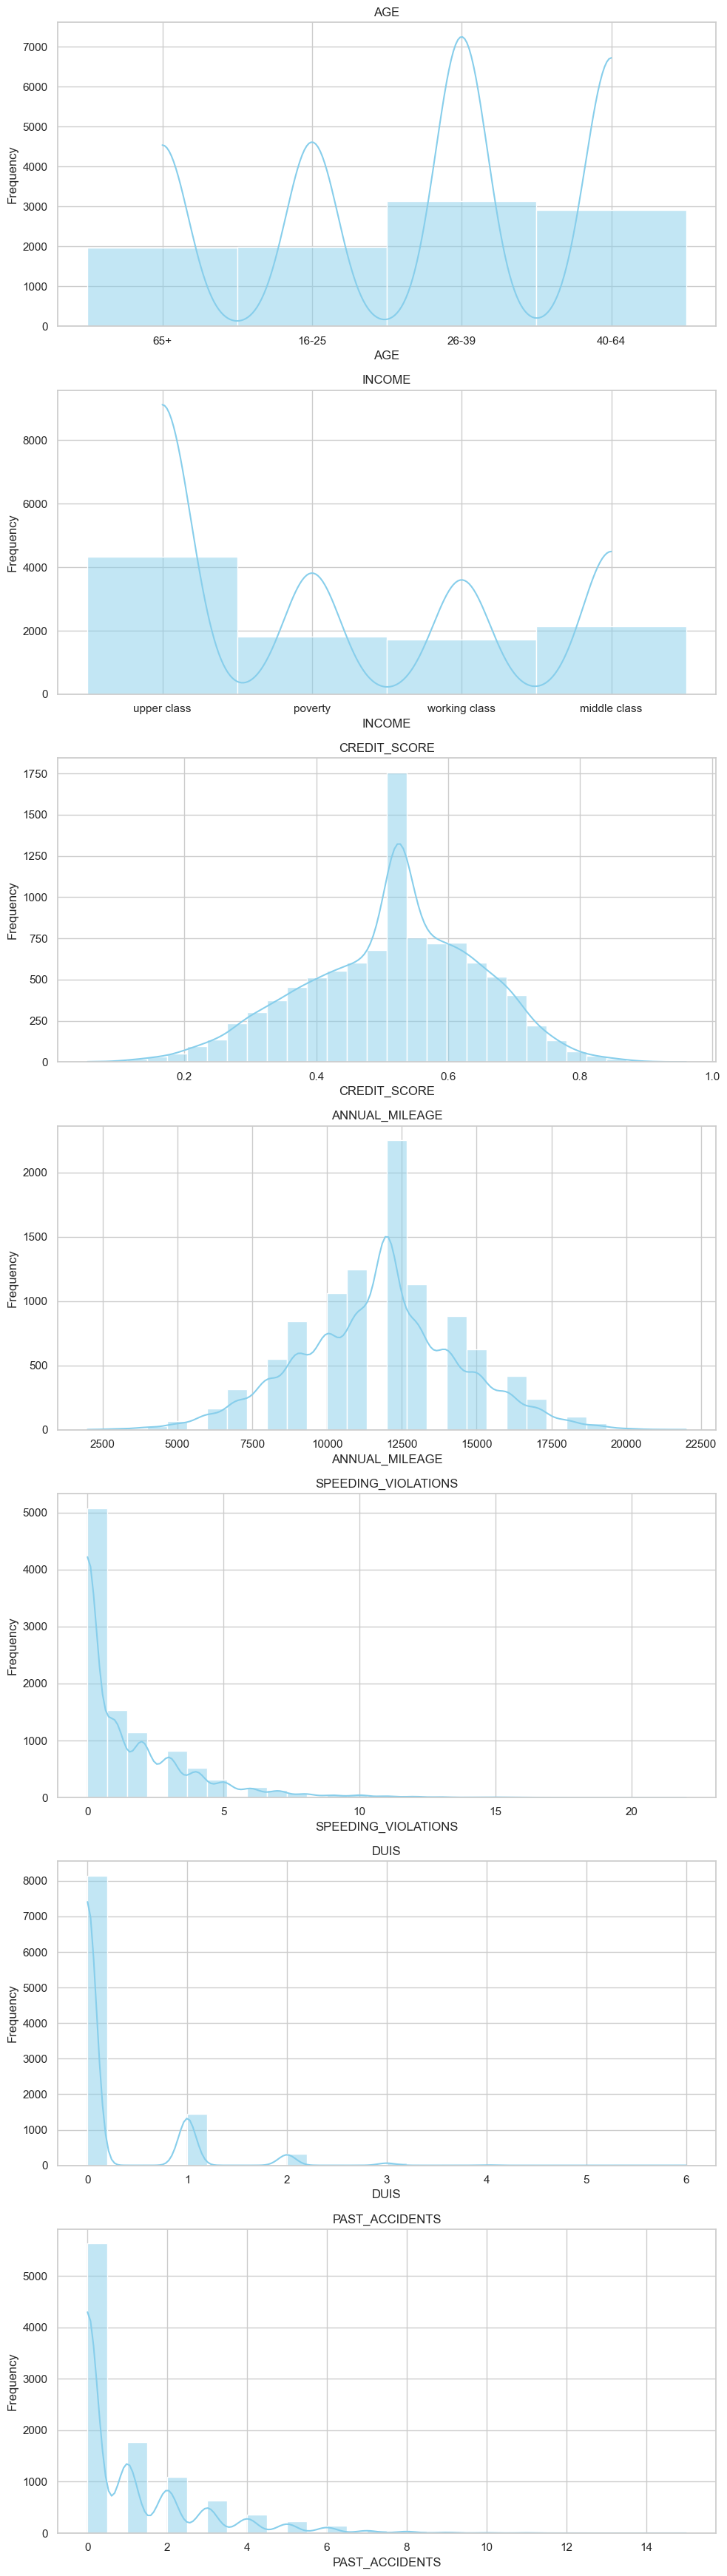

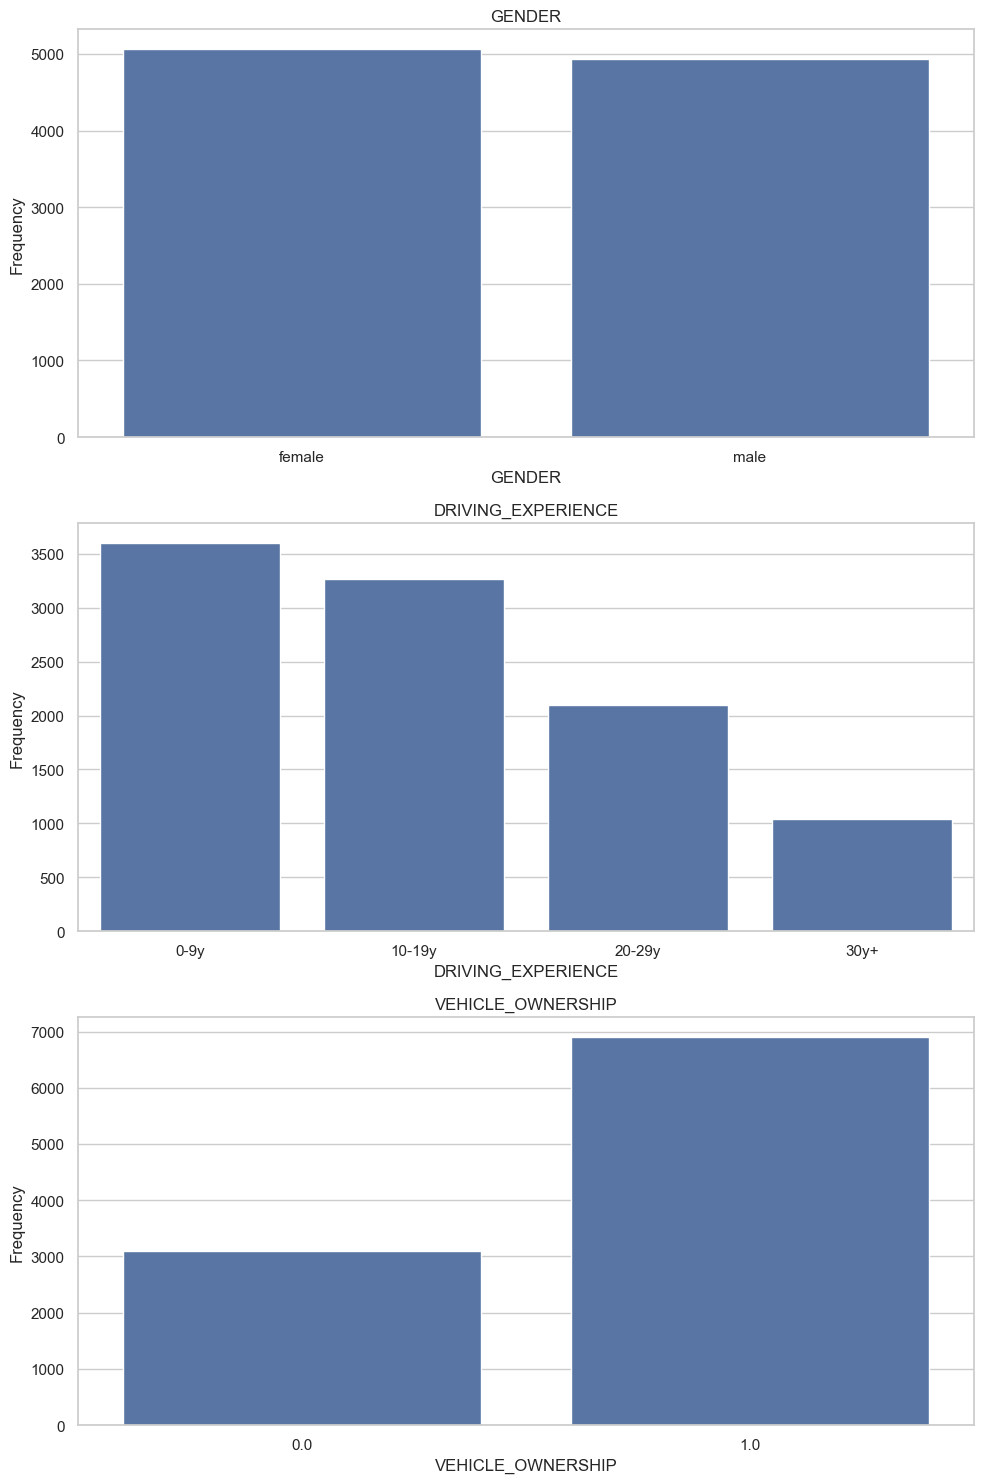

In [106]:
numerical_columns = ['AGE', 'INCOME', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

plt.figure(figsize=(10, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

categorical_columns = ['GENDER', 'DRIVING_EXPERIENCE', 'VEHICLE_OWNERSHIP']

plt.figure(figsize=(10, len(categorical_columns) * 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=df, x=column, hue=None, legend=False)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

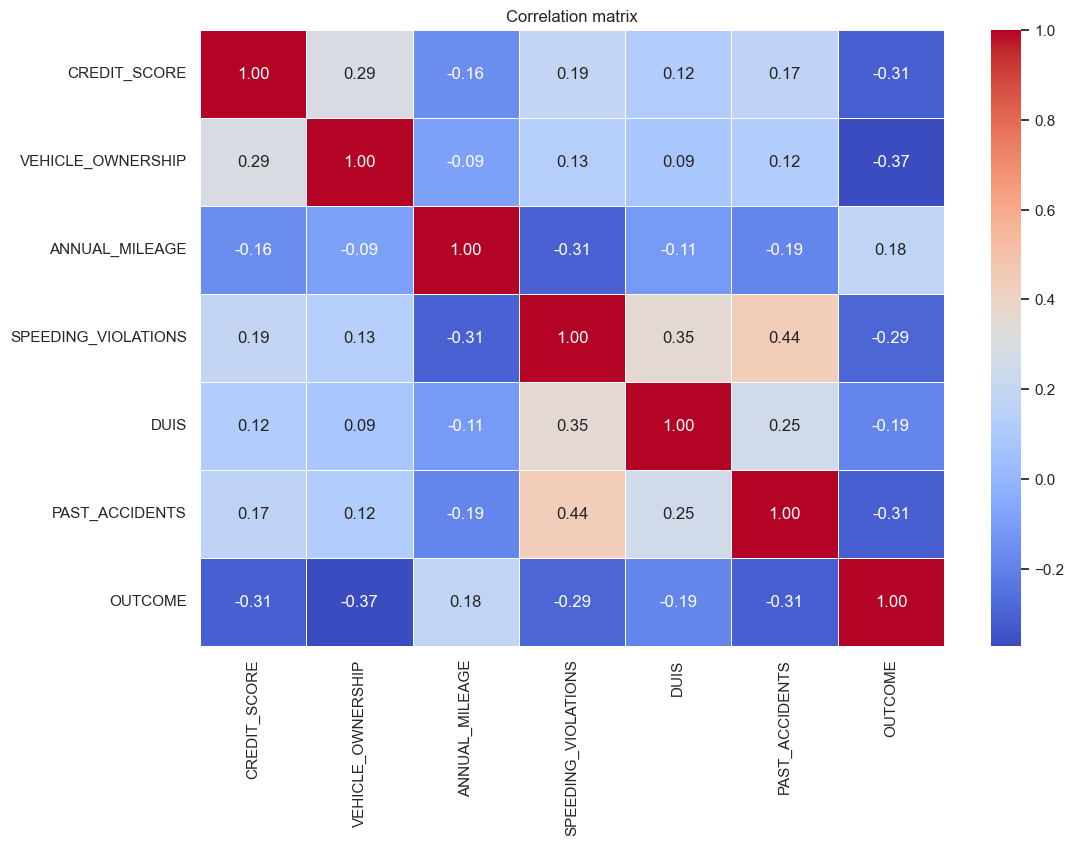

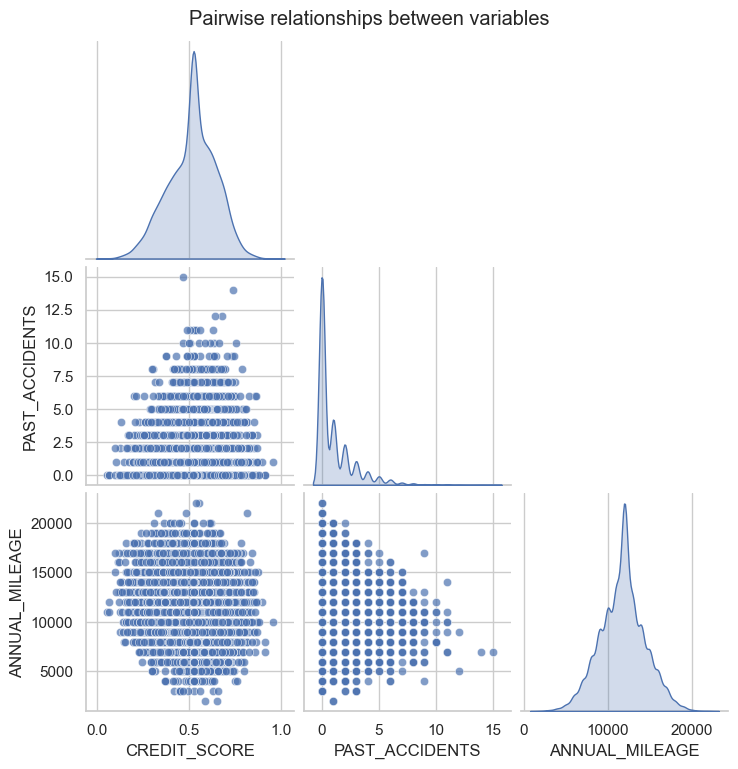

In [107]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

pairplot_columns = ['CREDIT_SCORE', 'INCOME', 'PAST_ACCIDENTS', 'AGE', 'ANNUAL_MILEAGE']
sns.pairplot(df[pairplot_columns], diag_kind="kde", corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise relationships between variables", y=1.02)
plt.show()

Conclusion

After Exploratory Data Analysis, we identified, that:
Factors like Gender, Income level , Maritial status Doesn`t affect approval of insurance(the factors, that I dropped, like race, postal code, probably, doesnt affect too.)
The main factors for approval insurance were: Credit score, Driving expirience, Previous violations, Vehicle Ownership and Annual Millage do affect of approval.
So now company, can update their policy, and dont collect huge amount of data about their clients, and just take what really matters.